# Testing Algorithms

In [267]:
import pandas as pd
import numpy as np
import math
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 200)

TEST = False

## Retrieve the datasets

In [268]:
test_data = pd.read_csv("./encoded_test.csv", na_values= ['?', 'NA', ''],sep= ',')
train_data = pd.read_csv("./encoded_train.csv",na_values= ['?', 'NA', ''],sep=  ',')


## Build Prediction
This function builds the csv for submiting in kaggle

In [269]:
def build_prediction(pred):
    if TEST:
        pred = pd.DataFrame(pred, columns=['col','Predicted'])
        pred.drop('col', axis=1, inplace=True)
        loan_id = pd.DataFrame(test_data, columns=['loan_id'])

        results = pd.concat([loan_id, pred], axis=1)
        results = results.rename(
                columns={'loan_id': 'Id'})

        results.to_csv('results.csv', index = False)
       
        return results
    else:
        report = classification_report(y_test, pred, output_dict=True,zero_division= 0)

        print(f"Report:\n{classification_report(y_test, pred,zero_division= 0)}\n")

        sb.set(font_scale=1.0)
        
        ax = plt.subplot()
        cm = confusion_matrix(y_test, pred)

        sb.heatmap(cm, annot=True, ax=ax, fmt="g")

        ax.set_xlabel('Predicted');
        ax.set_ylabel('Observed');
        ax.set_title('Confusion Matrix');
        plt.show()


In [270]:
inputs = train_data.drop(columns=['loan_id', 'status'])
labels = train_data['status'].values

if (TEST):
    X_train = train_data.drop(columns=['loan_id', 'status'])
    y_train = train_data['status'].values

    X_test = test_data.drop(columns=['loan_id', 'status'])
    y_test = test_data['status'].values
else:
    (X_train, X_test, y_train, y_test) = train_test_split(inputs, labels, test_size=0.25, random_state=1)



## Decision Tree

Report:
              precision    recall  f1-score   support

          -1       0.28      0.45      0.34        11
           1       0.91      0.82      0.86        71

    accuracy                           0.77        82
   macro avg       0.59      0.64      0.60        82
weighted avg       0.82      0.77      0.79        82




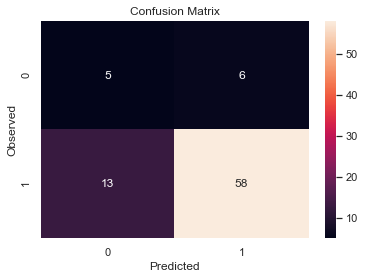

In [271]:
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

pred= decision_tree_classifier.predict_proba(X_test) if TEST else decision_tree_classifier.predict(X_test)
build_prediction(pred)


In [272]:
parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': range(10, 20),
                  'max_features': range(10,20)}

grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=parameter_grid,
                           cv=10,
                           verbose=4,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Best score: 0.8781666666666667
Best parameters: {'criterion': 'gini', 'max_depth': 16, 'max_features': 16, 'splitter': 'random'}
Best estimator: DecisionTreeClassifier(max_depth=16, max_features=16, splitter='random')


Report:
              precision    recall  f1-score   support

          -1       0.44      0.64      0.52        11
           1       0.94      0.87      0.91        71

    accuracy                           0.84        82
   macro avg       0.69      0.75      0.71        82
weighted avg       0.87      0.84      0.85        82




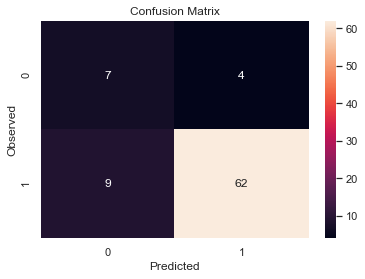

In [273]:
decision_tree_classifier = grid_search.best_estimator_

pred= decision_tree_classifier.predict_proba(X_test) if TEST else decision_tree_classifier.predict(X_test)
build_prediction(pred)

## SVC 

Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        11
           1       0.87      1.00      0.93        71

    accuracy                           0.87        82
   macro avg       0.43      0.50      0.46        82
weighted avg       0.75      0.87      0.80        82




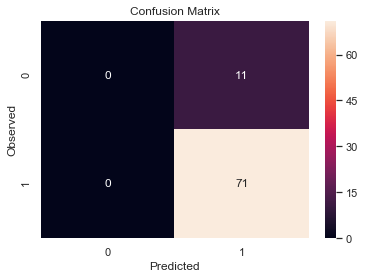

In [274]:

svc = SVC(probability=True)
svc.fit(X_train, y_train)

pred= svc.predict_proba(X_test) if TEST else svc.predict(X_test)
results=build_prediction(pred)

     

c:\Programs\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
Report:
              precision    recall  f1-score   support

          -1       0.62      0.45      0.53        11
           1       0.92      0.96      0.94        71

    accuracy                           0.89        82
   macro avg       0.77      0.71      0.73        82
weighted avg       0.88      0.89      0.88        82




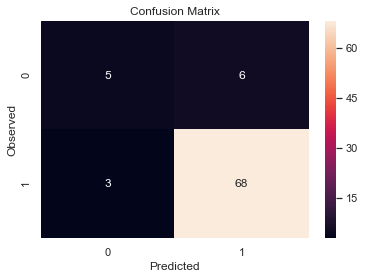

In [275]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

ANNClassifier = MLPClassifier(random_state=1, max_iter=500)

# Train the classifier on the training set
ANNClassifier.fit(X_train, y_train)

pred= ANNClassifier.predict_proba(X_test) if TEST else ANNClassifier.predict(X_test)
build_prediction(pred)


